## Covid-19 Vaccination Analysis

Download data from https://www.kaggle.com/gpreda/covid-world-vaccination-progress

In [1]:
import numpy as np
import pandas as pd

In [ ]:
#!pip install plotly #No need for colab

In [2]:
# Import plotting libraries.
# Plotly can be useful for Choropleth, display of data on maps.

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

In [3]:
# Load the data into a pandas dataframe

df = pd.read_csv("https://raw.githubusercontent.com/enrique-carbo/data/main/country_vaccinations_oct2021.csv")

In [4]:
df.head(10)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
5,Afghanistan,AFG,2021-02-27,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
6,Afghanistan,AFG,2021-02-28,8200.0,8200.0,NaN,NaN,1367.0,0.02,0.02,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
7,Afghanistan,AFG,2021-03-01,NaN,NaN,NaN,NaN,1580.0,NaN,NaN,NaN,40.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
8,Afghanistan,AFG,2021-03-02,NaN,NaN,NaN,NaN,1794.0,NaN,NaN,NaN,45.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
9,Afghanistan,AFG,2021-03-03,NaN,NaN,NaN,NaN,2008.0,NaN,NaN,NaN,50.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


Above, we see a lot of NaNs that we need to fill with some values, zeros make the most sense here. Let us check how many NaNs for each column

In [5]:
df.isnull().sum()

country                                    0
iso_code                                   0
date                                       0
total_vaccinations                     24539
people_vaccinated                      26055
people_fully_vaccinated                28972
daily_vaccinations_raw                 29760
daily_vaccinations                       265
total_vaccinations_per_hundred         24539
people_vaccinated_per_hundred          26055
people_fully_vaccinated_per_hundred    28972
daily_vaccinations_per_million           265
vaccines                                   0
source_name                                0
source_website                             0
dtype: int64

In [6]:
# Fill NaNs with 0 and then drop all countries with iso_code = 0. This is key information that we need so dropping unknowns

df.fillna(0, inplace=True)
df.drop(df.index[df['iso_code'] == 0], inplace= True)

In [7]:
df.isnull().sum()

country                                0
iso_code                               0
date                                   0
total_vaccinations                     0
people_vaccinated                      0
people_fully_vaccinated                0
daily_vaccinations_raw                 0
daily_vaccinations                     0
total_vaccinations_per_hundred         0
people_vaccinated_per_hundred          0
people_fully_vaccinated_per_hundred    0
daily_vaccinations_per_million         0
vaccines                               0
source_name                            0
source_website                         0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53595 entries, 0 to 53594
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              53595 non-null  object 
 1   iso_code                             53595 non-null  object 
 2   date                                 53595 non-null  object 
 3   total_vaccinations                   53595 non-null  float64
 4   people_vaccinated                    53595 non-null  float64
 5   people_fully_vaccinated              53595 non-null  float64
 6   daily_vaccinations_raw               53595 non-null  float64
 7   daily_vaccinations                   53595 non-null  float64
 8   total_vaccinations_per_hundred       53595 non-null  float64
 9   people_vaccinated_per_hundred        53595 non-null  float64
 10  people_fully_vaccinated_per_hundred  53595 non-null  float64
 11  daily_vaccinations_per_milli

The date is in the 'object' format. Let us change itto Datetime format for easy handling and plotting.

In [9]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53595 entries, 0 to 53594
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   country                              53595 non-null  object        
 1   iso_code                             53595 non-null  object        
 2   date                                 53595 non-null  datetime64[ns]
 3   total_vaccinations                   53595 non-null  float64       
 4   people_vaccinated                    53595 non-null  float64       
 5   people_fully_vaccinated              53595 non-null  float64       
 6   daily_vaccinations_raw               53595 non-null  float64       
 7   daily_vaccinations                   53595 non-null  float64       
 8   total_vaccinations_per_hundred       53595 non-null  float64       
 9   people_vaccinated_per_hundred        53595 non-null  float64       
 10  people_ful

In [11]:
# Print columns names and drop the ones we don't intend to use
df.columns

Index(['country', 'iso_code', 'date', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'daily_vaccinations_per_million',
       'vaccines', 'source_name', 'source_website'],
      dtype='object')

In [15]:
df.drop(["daily_vaccinations_raw", "daily_vaccinations_per_million",
         "source_name", "source_website"], axis=1, inplace=True)

Now, let us try to understand the data. I am picking US and India for my study

### USA

In [16]:
# Save USA data into a separate dataframe

df_USA = df[df['iso_code'] == 'USA'].copy()

In [17]:
df_USA

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,vaccines
51127,United States,USA,2020-12-20,556208.0,556208.0,0.0,0.0,0.17,0.17,0.00,"Johnson&Johnson, Moderna, Pfizer/BioNTech"
51128,United States,USA,2020-12-21,614117.0,614117.0,0.0,57909.0,0.18,0.18,0.00,"Johnson&Johnson, Moderna, Pfizer/BioNTech"
51129,United States,USA,2020-12-22,0.0,0.0,0.0,127432.0,0.00,0.00,0.00,"Johnson&Johnson, Moderna, Pfizer/BioNTech"
51130,United States,USA,2020-12-23,1008025.0,1008025.0,0.0,150606.0,0.30,0.30,0.00,"Johnson&Johnson, Moderna, Pfizer/BioNTech"
51131,United States,USA,2020-12-24,0.0,0.0,0.0,191001.0,0.00,0.00,0.00,"Johnson&Johnson, Moderna, Pfizer/BioNTech"
...,...,...,...,...,...,...,...,...,...,...,...
51433,United States,USA,2021-10-22,411963025.0,219900525.0,190179553.0,770307.0,122.49,65.38,56.55,"Johnson&Johnson, Moderna, Pfizer/BioNTech"
51434,United States,USA,2021-10-23,412856169.0,220145796.0,190402262.0,772744.0,122.76,65.46,56.61,"Johnson&Johnson, Moderna, Pfizer/BioNTech"
51435,United States,USA,2021-10-24,413645478.0,220351217.0,190578704.0,768503.0,122.99,65.52,56.67,"Johnson&Johnson, Moderna, Pfizer/BioNTech"
51436,United States,USA,2021-10-25,414302192.0,220519217.0,190699790.0,786321.0,123.19,65.57,56.70,"Johnson&Johnson, Moderna, Pfizer/BioNTech"


In [19]:
# Drop the dates with missing values, previously NaN that we filled with 0.

df_USA.drop(df_USA.index[df_USA['total_vaccinations'] == 0], inplace=True)

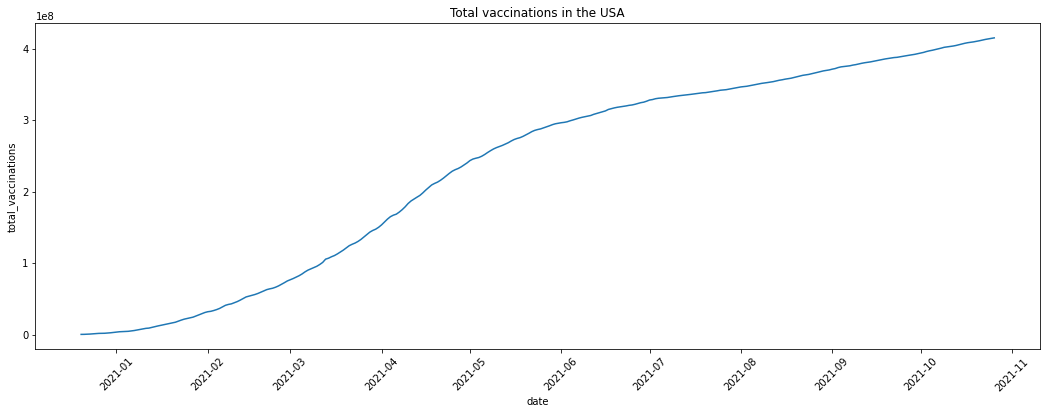

In [20]:
# Plot total vaccinations as a function of date

plt.figure(figsize=(18,6))
sns.lineplot(data=df_USA, x="date", y="total_vaccinations")
plt.title("Total vaccinations in the USA")
plt.xticks(rotation=45)
plt.show()


(array([737791., 737822., 737850., 737881., 737911., 737942., 737972.,
        738003., 738034., 738064., 738095.]),
 <a list of 11 Text major ticklabel objects>)

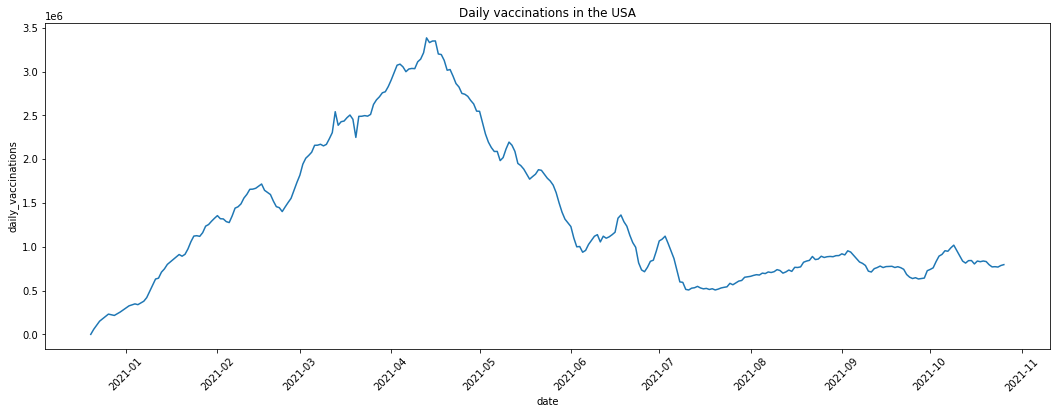

In [26]:
# Plot daily vaccinations as a function of date

plt.figure(figsize=(18,6))
sns.lineplot(data=df_USA, x="date", y="daily_vaccinations")
plt.title("Daily vaccinations in the USA")
plt.xticks(rotation=45)


### India

In [24]:
# Save India data into a separate dataframe

df_India = df[df["iso_code"] == 'IND'].copy()
df_India

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,vaccines
21866,India,IND,2021-01-15,0.000000e+00,0.0,0.0,0.0,0.00,0.00,0.00,"Covaxin, Oxford/AstraZeneca, Sputnik V"
21867,India,IND,2021-01-16,1.911810e+05,191181.0,0.0,191181.0,0.01,0.01,0.00,"Covaxin, Oxford/AstraZeneca, Sputnik V"
21868,India,IND,2021-01-17,2.243010e+05,224301.0,0.0,112150.0,0.02,0.02,0.00,"Covaxin, Oxford/AstraZeneca, Sputnik V"
21869,India,IND,2021-01-18,4.540490e+05,454049.0,0.0,151350.0,0.03,0.03,0.00,"Covaxin, Oxford/AstraZeneca, Sputnik V"
21870,India,IND,2021-01-19,6.748350e+05,674835.0,0.0,168709.0,0.05,0.05,0.00,"Covaxin, Oxford/AstraZeneca, Sputnik V"
...,...,...,...,...,...,...,...,...,...,...,...
22146,India,IND,2021-10-22,1.009946e+09,712404590.0,297541073.0,5540317.0,72.48,51.13,21.35,"Covaxin, Oxford/AstraZeneca, Sputnik V"
22147,India,IND,2021-10-23,1.013637e+09,714084133.0,299553298.0,5850184.0,72.75,51.25,21.50,"Covaxin, Oxford/AstraZeneca, Sputnik V"
22148,India,IND,2021-10-24,1.022268e+09,717676310.0,304591540.0,6560451.0,73.36,51.51,21.86,"Covaxin, Oxford/AstraZeneca, Sputnik V"
22149,India,IND,2021-10-25,1.024150e+09,718444141.0,305705808.0,6456459.0,73.50,51.56,21.94,"Covaxin, Oxford/AstraZeneca, Sputnik V"


In [25]:
# Drop the dates with missing values, previously NaN that we filled with 0.

df_India.drop(df_India.index[df_India['total_vaccinations'] == 0], inplace=True)

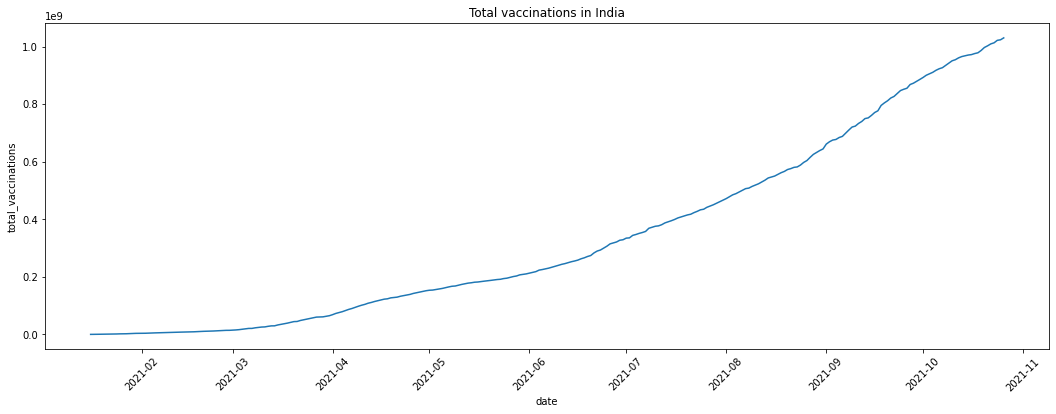

In [27]:
# Plot total vaccinations as a function of date

plt.figure(figsize=(18,6))
sns.lineplot(data=df_India, x="date", y="total_vaccinations")
plt.title("Total vaccinations in India")
plt.xticks(rotation=45)
plt.show()


(array([737822., 737850., 737881., 737911., 737942., 737972., 738003.,
        738034., 738064., 738095.]),
 <a list of 10 Text major ticklabel objects>)

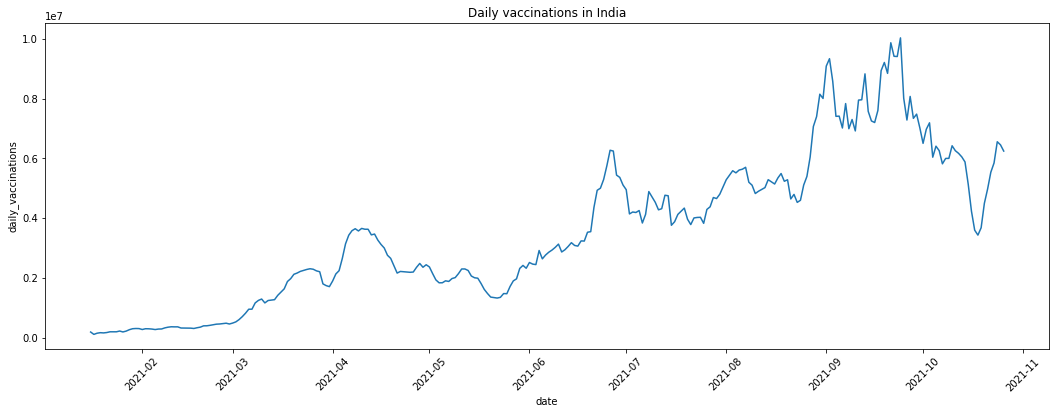

In [28]:
# Plot daily vaccinations as a function of date

plt.figure(figsize=(18,6))
sns.lineplot(data=df_India, x="date", y="daily_vaccinations")
plt.title("Daily vaccinations in India")
plt.xticks(rotation=45)

### Germany

In [38]:
# Save India data into a separate dataframe

df_Germany = df[df["iso_code"] == 'DEU'].copy()
df_Germany

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,vaccines
17890,Germany,DEU,2020-12-27,24354.0,24343.0,11.0,0.0,0.03,0.03,0.00,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ..."
17891,Germany,DEU,2020-12-28,42458.0,42382.0,76.0,18104.0,0.05,0.05,0.00,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ..."
17892,Germany,DEU,2020-12-29,93065.0,92335.0,729.0,34356.0,0.11,0.11,0.00,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ..."
17893,Germany,DEU,2020-12-30,157066.0,156304.0,761.0,44237.0,0.19,0.19,0.00,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ..."
17894,Germany,DEU,2020-12-31,207061.0,206212.0,848.0,45677.0,0.25,0.25,0.00,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ..."
...,...,...,...,...,...,...,...,...,...,...,...
18188,Germany,DEU,2021-10-21,110648642.0,57434498.0,54985458.0,126615.0,131.88,68.46,65.54,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ..."
18189,Germany,DEU,2021-10-22,110801709.0,57473493.0,55050407.0,124546.0,132.06,68.50,65.61,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ..."
18190,Germany,DEU,2021-10-23,110841262.0,57486946.0,55068281.0,124547.0,132.11,68.52,65.64,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ..."
18191,Germany,DEU,2021-10-24,110854282.0,57491118.0,55074367.0,124066.0,132.13,68.52,65.64,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ..."


In [39]:
# Drop the dates with missing values, previously NaN that we filled with 0.

df_Germany.drop(df_Germany.index[df_Germany['total_vaccinations'] == 0], inplace=True)

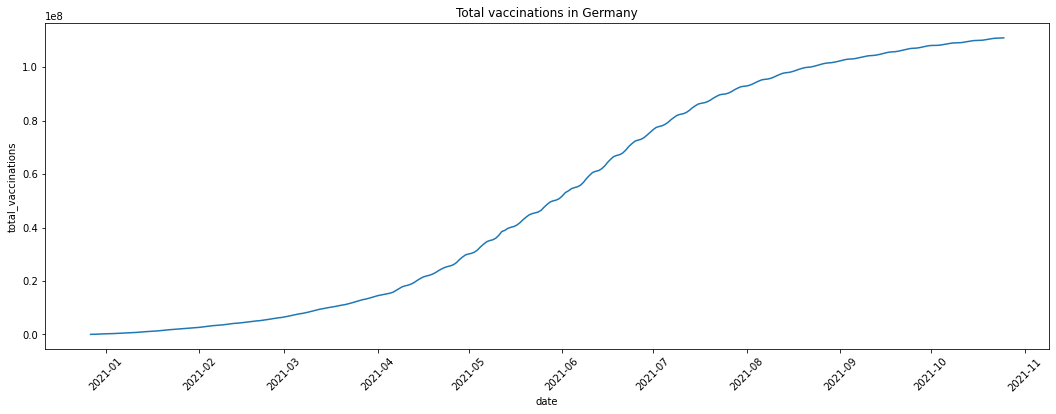

In [40]:
# Plot total vaccinations as a function of date

plt.figure(figsize=(18,6))
sns.lineplot(data=df_Germany, x="date", y="total_vaccinations")
plt.title("Total vaccinations in Germany")
plt.xticks(rotation=45)
plt.show()

(array([737791., 737822., 737850., 737881., 737911., 737942., 737972.,
        738003., 738034., 738064., 738095.]),
 <a list of 11 Text major ticklabel objects>)

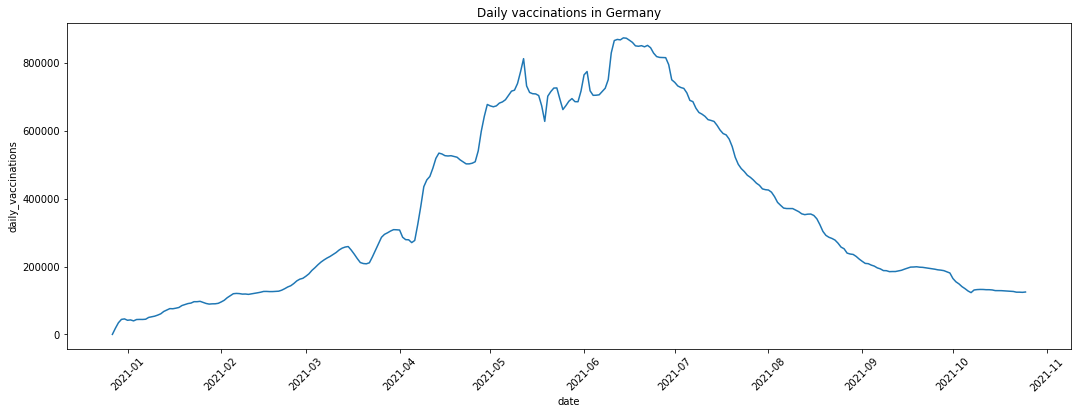

In [41]:
# Plot daily vaccinations as a function of date

plt.figure(figsize=(18,6))
sns.lineplot(data=df_Germany, x="date", y="daily_vaccinations")
plt.title("Daily vaccinations in Germany")
plt.xticks(rotation=45)

Top 10 countries with highest amount of vaccinated peaople per 100 of the population. (First sorted by total vaccinations deployed to make sure the data is not skewed by small countries with low populations)

In [42]:
# Group by total vaccinations given by country and sort descending to identify the top 10 countries.

vacc_by_country = df.groupby('country').max().sort_values('total_vaccinations', ascending=False)
vacc_by_country = vacc_by_country.iloc[:10]
vacc_by_country

,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,vaccines
country,,,,,,,,,,
China,CHN,2021-10-26,2.251339e+09,1.100842e+09,1.067621e+09,22424286.0,155.89,76.22,73.92,"CanSino, Sinopharm/Beijing, Sinopharm/Wuhan, S..."
India,IND,2021-10-26,1.030850e+09,7.211491e+08,3.097010e+08,10037995.0,73.98,51.75,22.23,"Covaxin, Oxford/AstraZeneca, Sputnik V"
United States,USA,2021-10-26,4.150120e+08,2.206488e+08,1.907931e+08,3384387.0,123.40,65.61,56.73,"Johnson&Johnson, Moderna, Pfizer/BioNTech"
Brazil,BRA,2021-10-26,2.701074e+08,1.587227e+08,1.161930e+08,2045834.0,126.22,74.17,54.30,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
Japan,JPN,2021-10-25,1.859792e+08,9.718129e+07,8.879791e+07,1997542.0,147.54,77.10,70.45,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech"
Indonesia,IDN,2021-10-26,1.834772e+08,1.143471e+08,6.913012e+07,1897011.0,66.39,41.38,25.01,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, ..."
Turkey,TUR,2021-10-26,1.156746e+08,5.525654e+07,4.831975e+07,1264431.0,136.02,64.98,56.82,"Pfizer/BioNTech, Sinovac"
Mexico,MEX,2021-10-24,1.156246e+08,7.004907e+07,5.385392e+07,1088095.0,88.76,53.78,41.34,"CanSino, Johnson&Johnson, Moderna, Oxford/Astr..."
Germany,DEU,2021-10-25,1.109504e+08,5.751572e+07,5.511270e+07,874929.0,132.24,68.55,65.69,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ..."


In [43]:
# Now sort by total vaccinations per 100

vacc_by_country = vacc_by_country.sort_values('total_vaccinations_per_hundred', ascending=False)
vacc_by_country

,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,vaccines
country,,,,,,,,,,
China,CHN,2021-10-26,2.251339e+09,1.100842e+09,1.067621e+09,22424286.0,155.89,76.22,73.92,"CanSino, Sinopharm/Beijing, Sinopharm/Wuhan, S..."
Japan,JPN,2021-10-25,1.859792e+08,9.718129e+07,8.879791e+07,1997542.0,147.54,77.10,70.45,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech"
Turkey,TUR,2021-10-26,1.156746e+08,5.525654e+07,4.831975e+07,1264431.0,136.02,64.98,56.82,"Pfizer/BioNTech, Sinovac"
Germany,DEU,2021-10-25,1.109504e+08,5.751572e+07,5.511270e+07,874929.0,132.24,68.55,65.69,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ..."
Brazil,BRA,2021-10-26,2.701074e+08,1.587227e+08,1.161930e+08,2045834.0,126.22,74.17,54.30,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
United States,USA,2021-10-26,4.150120e+08,2.206488e+08,1.907931e+08,3384387.0,123.40,65.61,56.73,"Johnson&Johnson, Moderna, Pfizer/BioNTech"
Mexico,MEX,2021-10-24,1.156246e+08,7.004907e+07,5.385392e+07,1088095.0,88.76,53.78,41.34,"CanSino, Johnson&Johnson, Moderna, Oxford/Astr..."
India,IND,2021-10-26,1.030850e+09,7.211491e+08,3.097010e+08,10037995.0,73.98,51.75,22.23,"Covaxin, Oxford/AstraZeneca, Sputnik V"
Indonesia,IDN,2021-10-26,1.834772e+08,1.143471e+08,6.913012e+07,1897011.0,66.39,41.38,25.01,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, ..."


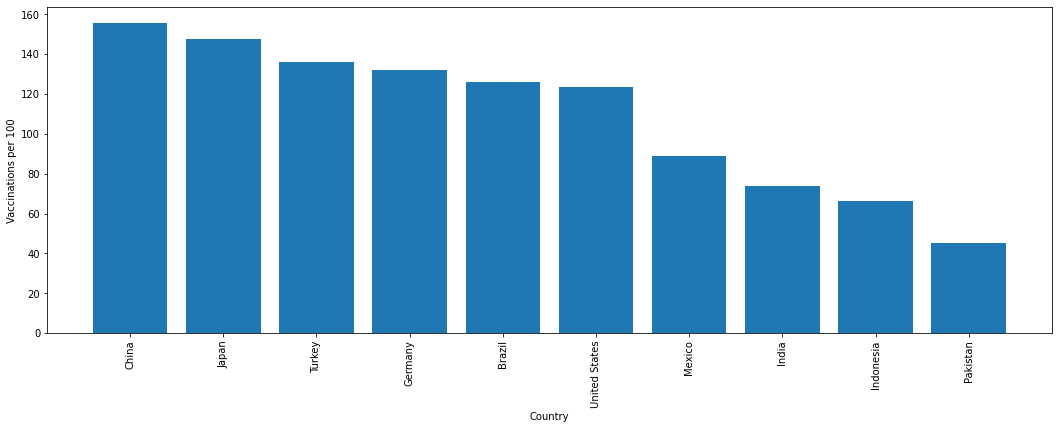

In [44]:
plt.figure(figsize=(18, 6))
plt.bar(vacc_by_country.index, vacc_by_country.total_vaccinations_per_hundred)

plt.xticks(rotation = 90)
plt.ylabel('Vaccinations per 100')
plt.xlabel('Country')
plt.show()

Country with most vaccinated people. Obviously, this will be skewed towards highest populated countries that effectively deployed vaccinations to bulk of its populations.

In [45]:
total_vacc_by_country = df.groupby('country').max().sort_values('total_vaccinations', ascending=False)
total_vacc_by_country = total_vacc_by_country.iloc[:10]
total_vacc_by_country

,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,vaccines
country,,,,,,,,,,
China,CHN,2021-10-26,2.251339e+09,1.100842e+09,1.067621e+09,22424286.0,155.89,76.22,73.92,"CanSino, Sinopharm/Beijing, Sinopharm/Wuhan, S..."
India,IND,2021-10-26,1.030850e+09,7.211491e+08,3.097010e+08,10037995.0,73.98,51.75,22.23,"Covaxin, Oxford/AstraZeneca, Sputnik V"
United States,USA,2021-10-26,4.150120e+08,2.206488e+08,1.907931e+08,3384387.0,123.40,65.61,56.73,"Johnson&Johnson, Moderna, Pfizer/BioNTech"
Brazil,BRA,2021-10-26,2.701074e+08,1.587227e+08,1.161930e+08,2045834.0,126.22,74.17,54.30,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
Japan,JPN,2021-10-25,1.859792e+08,9.718129e+07,8.879791e+07,1997542.0,147.54,77.10,70.45,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech"
Indonesia,IDN,2021-10-26,1.834772e+08,1.143471e+08,6.913012e+07,1897011.0,66.39,41.38,25.01,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, ..."
Turkey,TUR,2021-10-26,1.156746e+08,5.525654e+07,4.831975e+07,1264431.0,136.02,64.98,56.82,"Pfizer/BioNTech, Sinovac"
Mexico,MEX,2021-10-24,1.156246e+08,7.004907e+07,5.385392e+07,1088095.0,88.76,53.78,41.34,"CanSino, Johnson&Johnson, Moderna, Oxford/Astr..."
Germany,DEU,2021-10-25,1.109504e+08,5.751572e+07,5.511270e+07,874929.0,132.24,68.55,65.69,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ..."


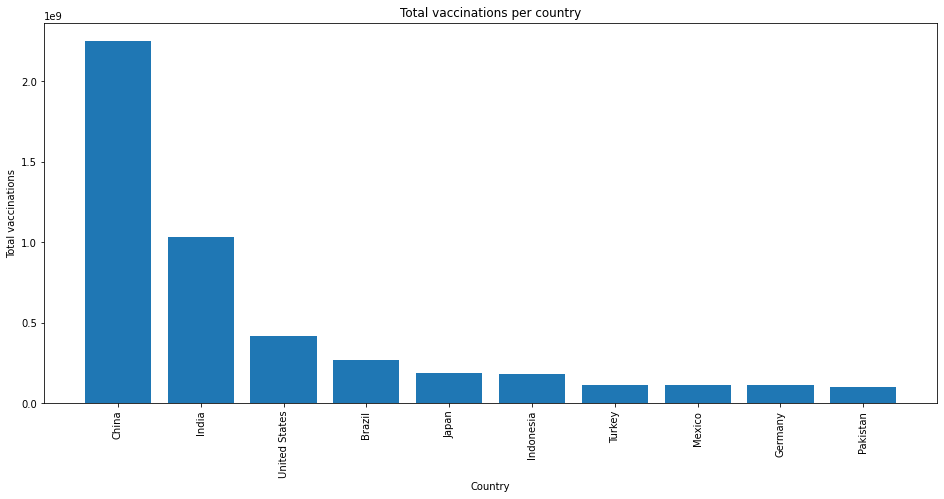

In [46]:
plt.figure(figsize=(16, 7))
plt.bar(total_vacc_by_country.index, total_vacc_by_country.total_vaccinations)

plt.title('Total vaccinations per country')
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Total vaccinations')
plt.show()

In [48]:
# Sort by total vaccinations delivered by countries and group by vaccines

vacc_names_by_country = df.groupby('vaccines').max().sort_values('total_vaccinations', ascending=False)
vacc_names_by_country.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred
vaccines,,,,,,,,,,
"CanSino, Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac, ZF2001",China,CHN,2021-10-26,2.251339e+09,1.100842e+09,1.067621e+09,22424286.0,155.89,76.22,73.92
"Covaxin, Oxford/AstraZeneca, Sputnik V",India,IND,2021-10-26,1.030850e+09,7.211491e+08,3.097010e+08,10037995.0,73.98,51.75,22.23
"Johnson&Johnson, Moderna, Pfizer/BioNTech",United States,USA,2021-10-26,4.150120e+08,2.206488e+08,1.907931e+08,3384387.0,151.96,76.96,75.79
"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac",Brazil,BRA,2021-10-26,2.701074e+08,1.587227e+08,1.161930e+08,2045834.0,126.22,74.17,54.30
"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Wales,SXM,2021-10-26,1.859792e+08,9.718129e+07,8.879791e+07,1997542.0,165.14,78.95,75.33


In [49]:
# Get the top 10 vaccines by country for easy plotting

vacc_names_by_country = vacc_names_by_country.iloc[:10]
vacc_names_by_country

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred
vaccines,,,,,,,,,,
"CanSino, Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac, ZF2001",China,CHN,2021-10-26,2.251339e+09,1.100842e+09,1.067621e+09,22424286.0,155.89,76.22,73.92
"Covaxin, Oxford/AstraZeneca, Sputnik V",India,IND,2021-10-26,1.030850e+09,7.211491e+08,3.097010e+08,10037995.0,73.98,51.75,22.23
"Johnson&Johnson, Moderna, Pfizer/BioNTech",United States,USA,2021-10-26,4.150120e+08,2.206488e+08,1.907931e+08,3384387.0,151.96,76.96,75.79
"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac",Brazil,BRA,2021-10-26,2.701074e+08,1.587227e+08,1.161930e+08,2045834.0,126.22,74.17,54.30
"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Wales,SXM,2021-10-26,1.859792e+08,9.718129e+07,8.879791e+07,1997542.0,165.14,78.95,75.33
"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sinovac",Indonesia,IDN,2021-10-26,1.834772e+08,1.143471e+08,6.913012e+07,1897011.0,66.39,41.38,25.01
"Pfizer/BioNTech, Sinovac",Turkey,TUR,2021-10-26,1.156746e+08,5.525654e+07,4.831975e+07,1264431.0,136.02,64.98,58.28
"CanSino, Johnson&Johnson, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, Sputnik V",Mexico,MEX,2021-10-24,1.156246e+08,7.004907e+07,5.385392e+07,1088095.0,88.76,53.78,41.34
"Johnson&Johnson, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Spain,ROU,2021-10-26,1.109504e+08,5.751572e+07,5.511270e+07,874929.0,169.02,88.63,87.16


In [50]:
#Reset index to move vaccines from being index to a column
# This makes it easy for us to plot using Seaborn, especially if we want to sort by country.

vacc_names_by_country = vacc_names_by_country.reset_index()
vacc_names_by_country

,vaccines,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred
0,"CanSino, Sinopharm/Beijing, Sinopharm/Wuhan, S...",China,CHN,2021-10-26,2.251339e+09,1.100842e+09,1.067621e+09,22424286.0,155.89,76.22,73.92
1,"Covaxin, Oxford/AstraZeneca, Sputnik V",India,IND,2021-10-26,1.030850e+09,7.211491e+08,3.097010e+08,10037995.0,73.98,51.75,22.23
2,"Johnson&Johnson, Moderna, Pfizer/BioNTech",United States,USA,2021-10-26,4.150120e+08,2.206488e+08,1.907931e+08,3384387.0,151.96,76.96,75.79
3,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",Brazil,BRA,2021-10-26,2.701074e+08,1.587227e+08,1.161930e+08,2045834.0,126.22,74.17,54.30
4,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Wales,SXM,2021-10-26,1.859792e+08,9.718129e+07,8.879791e+07,1997542.0,165.14,78.95,75.33
5,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, ...",Indonesia,IDN,2021-10-26,1.834772e+08,1.143471e+08,6.913012e+07,1897011.0,66.39,41.38,25.01
6,"Pfizer/BioNTech, Sinovac",Turkey,TUR,2021-10-26,1.156746e+08,5.525654e+07,4.831975e+07,1264431.0,136.02,64.98,58.28
7,"CanSino, Johnson&Johnson, Moderna, Oxford/Astr...",Mexico,MEX,2021-10-24,1.156246e+08,7.004907e+07,5.385392e+07,1088095.0,88.76,53.78,41.34
8,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",Spain,ROU,2021-10-26,1.109504e+08,5.751572e+07,5.511270e+07,874929.0,169.02,88.63,87.16
9,"CanSino, Covaxin, Moderna, Oxford/AstraZeneca,...",Pakistan,PAK,2021-10-26,1.020679e+08,6.934111e+07,3.930311e+07,1280906.0,45.32,30.79,17.45


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

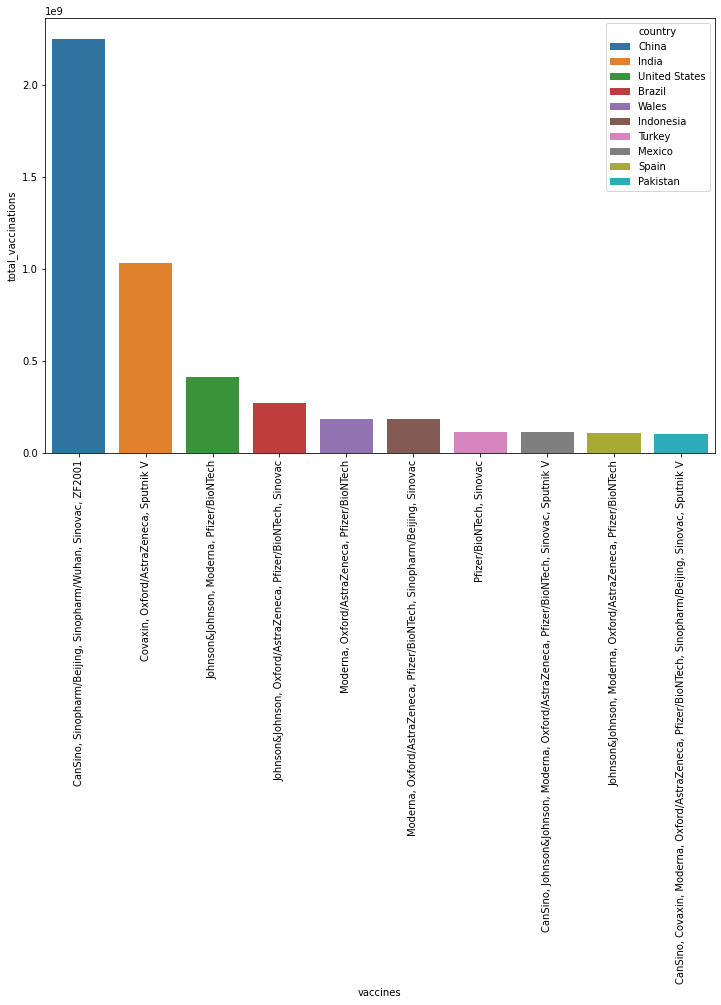

In [51]:
plt.figure(figsize=(12,8))

sns.barplot(data= vacc_names_by_country, x='vaccines', y= 'total_vaccinations', hue='country', dodge=False)
plt.xticks(rotation=90)



#### Total Vaccinations per hundred, by Country on a map  
Warning: This can make your browser very slow


In [52]:
fig = px.choropleth(df.reset_index(), locations="iso_code",
                    color= "total_vaccinations_per_hundred",
                    color_continuous_scale=px.colors.sequential.Electric,
                    title="Total Vaccinations per 100")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()